In [1]:
##Logistic Regression for surviving in titanic ship based on some features

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
#import dataset
titanic_data=pd.read_csv('titanic.csv')
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
print('# of passengers in original data: '+str(len(titanic_data.index)))

# of passengers in original data: 1310


# Analyzing Data

<AxesSubplot:xlabel='survived', ylabel='count'>

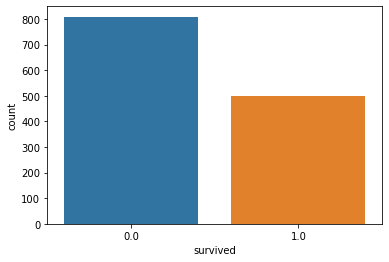

In [5]:
sns.countplot(x='survived',data=titanic_data)

<AxesSubplot:xlabel='survived', ylabel='count'>

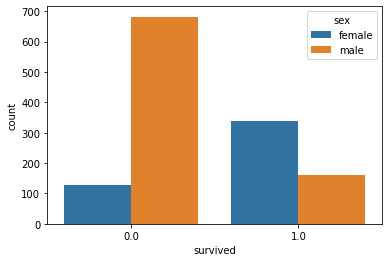

In [6]:
sns.countplot(x='survived',hue='sex',data=titanic_data)

<AxesSubplot:xlabel='survived', ylabel='count'>

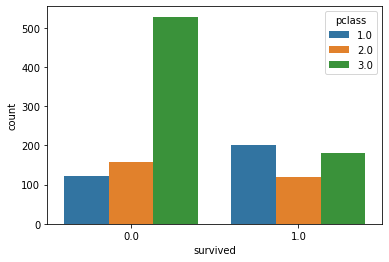

In [7]:
sns.countplot(x='survived',hue='pclass',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

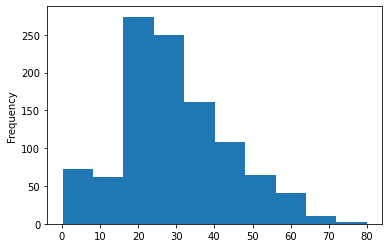

In [8]:
titanic_data['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

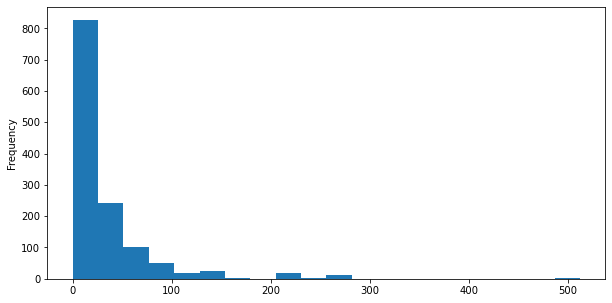

In [9]:
titanic_data['fare'].plot.hist(bins=20,figsize=(10,5))

In [10]:
titanic_data.info

<bound method DataFrame.info of       pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin emba

<AxesSubplot:xlabel='sibsp', ylabel='count'>

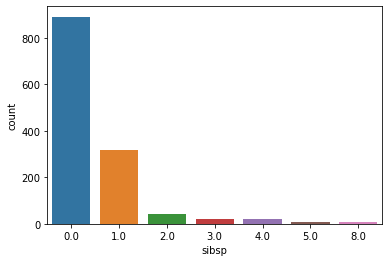

In [11]:
sns.countplot(x='sibsp',data=titanic_data)

<AxesSubplot:xlabel='parch', ylabel='count'>

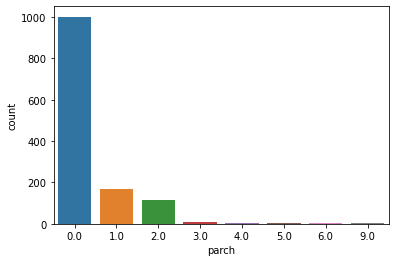

In [12]:
sns.countplot(x='parch',data=titanic_data)

# Data Wrangling

In [13]:
titanic_data.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True
1308,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [14]:
titanic_data.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:>

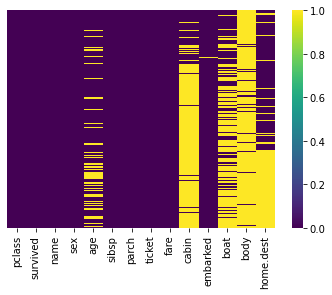

In [15]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='pclass', ylabel='age'>

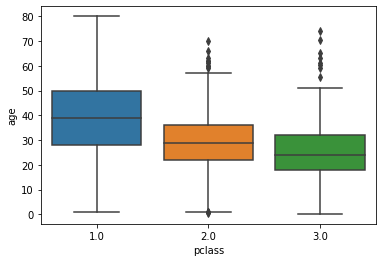

In [16]:
sns.boxplot(x='pclass',y='age',data=titanic_data)

In [17]:
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
titanic_data.drop("cabin",axis=1,inplace=True)

In [19]:
titanic_data.drop("boat",axis=1,inplace=True)

In [20]:
titanic_data.drop("body",axis=1,inplace=True)

In [21]:
titanic_data.drop("home.dest",axis=1,inplace=True)

In [22]:
titanic_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,S
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,S
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,S
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,S
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,C


<AxesSubplot:>

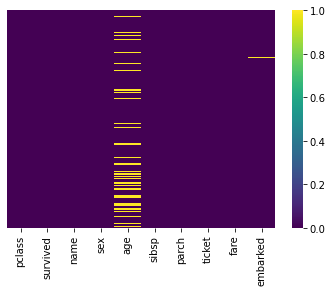

In [23]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

In [24]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

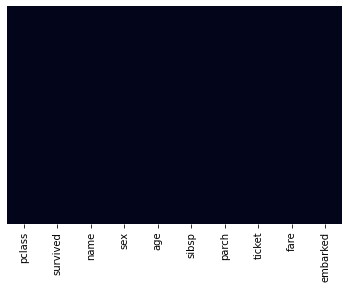

In [25]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [26]:
titanic_data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [27]:
titanic_data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S


In [28]:
sex=pd.get_dummies(titanic_data['sex'],drop_first=True)
sex.head(5)

,male
0,0
1,1
2,0
3,1
4,0


In [29]:
embark=pd.get_dummies(titanic_data['embarked'],drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
Pcl=pd.get_dummies(titanic_data['pclass'],drop_first=True)
Pcl.head(5)

,2.0,3.0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [31]:
titanic_data=pd.concat([titanic_data,sex,embark,Pcl],axis=1)

In [32]:
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S,2.0,3.0
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,0,0,1,0,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,1,0,1,0,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,0,0,1,0,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,1,0,1,0,0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,0,0,1,0,0


In [33]:
titanic_data.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [34]:
titanic_data.head(5)

,pclass,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [35]:
titanic_data.drop('pclass',axis=1,inplace=True)
titanic_data.head(5)

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


# Train Data

In [36]:
X=titanic_data.drop('survived',axis=1)
y=titanic_data['survived']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel=LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

C:\Users\lalit\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\lalit\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
predictions=logmodel.predict(X_test)

C:\Users\lalit\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         0.0       0.79      0.81      0.80       177\n         1.0       0.74      0.72      0.73       136\n\n    accuracy                           0.77       313\n   macro avg       0.77      0.76      0.77       313\nweighted avg       0.77      0.77      0.77       313\n'

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,predictions)

array([[143,  34],
       [ 38,  98]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,predictions)

0.7699680511182109